<h1>Zbiór danych jako dane treningowe i testowe

<h3>Informacje o zbiorze danych

In [1]:
import torch
import torch.nn as nn
import re
import numpy as np
import chess
import pandas as pd
import gc
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Module

In [3]:
chess_data_raw = pd.read_csv('Dataset/chess_games.csv')

In [2]:
chess_data_raw["Result"].unique()

NameError: name 'chess_data_raw' is not defined

In [4]:
chess_data_raw.head

<bound method NDFrame.head of                       Event                 White           Black Result  \
0                Classical                eisaaaa        HAMID449    1-0   
1                    Blitz                 go4jas      Sergei1973    0-1   
2         Blitz tournament        Evangelistaizac          kafune    1-0   
3           Correspondence                 Jvayne        Wsjvayne    1-0   
4         Blitz tournament                 kyoday       BrettDale    0-1   
...                     ...                   ...             ...    ...   
6256179              Blitz             GustavScar         WEBRIFF    1-0   
6256180          Classical                 apgaro         Camposf    1-0   
6256181             Bullet   matematico1234567890  cecile_creteil    0-1   
6256182             Bullet            MagnusMinor          shegap    0-1   
6256183          Classical              SocratAss          KOSMA7    0-1   

            UTCDate   UTCTime  WhiteElo  BlackElo  WhiteR

In [3]:
# Dane WhiteElo
white_elo_data = chess_data_raw['WhiteElo']

# Obliczanie średniej
mean_white_elo = np.mean(white_elo_data)

# Obliczanie mediany
median_white_elo = np.median(white_elo_data)

# Obliczanie odchylenia standardowego
std_dev_white_elo = np.std(white_elo_data)

print("Średnia WhiteElo:", mean_white_elo)
print("Mediana WhiteElo:", median_white_elo)
print("Odchylenie standardowe WhiteElo:", std_dev_white_elo)

Średnia WhiteElo: 1741.9453049974234
Mediana WhiteElo: 1740.0
Odchylenie standardowe WhiteElo: 265.717031601524


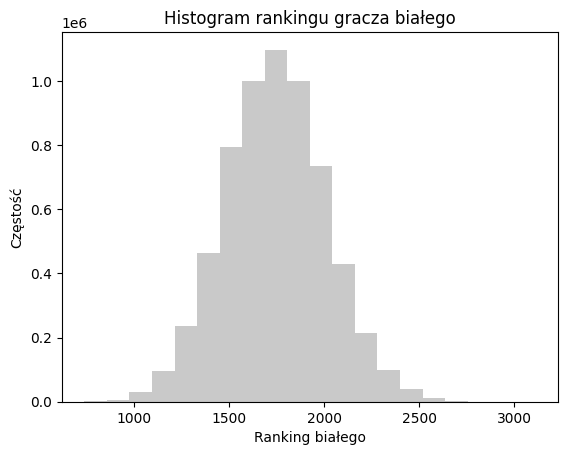

In [6]:
import matplotlib.pyplot as plt

# Dane przykładowe (ponieważ nie mam dostępu do chess_data_raw)
import pandas as pd
import numpy as np

# Wykres histogramu dla WhiteElo
plt.hist(chess_data_raw['WhiteElo'], bins=20, color='0.7', alpha=0.7)

# Dodanie linii odcięcia przy rankingu 1800
#plt.axvline(x=1800, color='red', linestyle='--', linewidth=2, label='Linia odcięcia (1800)')

plt.xlabel('Ranking białego')
plt.ylabel('Częstość')
plt.title('Histogram rankingu gracza białego')
# Dodanie legendy
#plt.legend()

plt.show()

In [10]:
# Dane WhiteElo
white_elo_data = chess_data_raw['BlackElo']

# Obliczanie średniej
mean_white_elo = np.mean(white_elo_data)

# Obliczanie mediany
median_white_elo = np.median(white_elo_data)

# Obliczanie odchylenia standardowego
std_dev_white_elo = np.std(white_elo_data)

print("Średnia WhiteElo:", mean_white_elo)
print("Mediana WhiteElo:", median_white_elo)
print("Odchylenie standardowe WhiteElo:", std_dev_white_elo)

Średnia WhiteElo: 1740.390282638746
Mediana WhiteElo: 1739.0
Odchylenie standardowe WhiteElo: 266.8937842077727


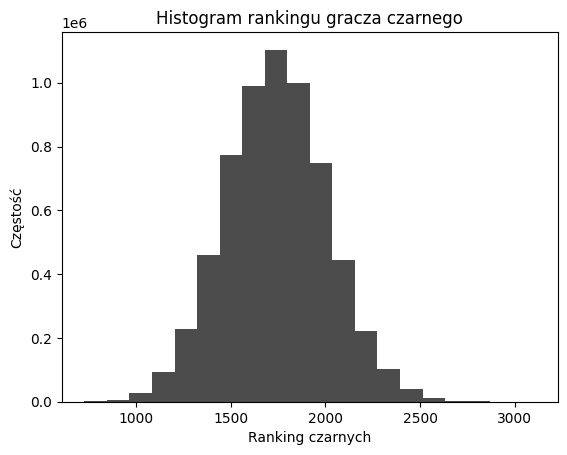

In [8]:
# Wykres histogramu dla BlackElo
plt.hist(chess_data_raw['BlackElo'], bins=20, color='black', alpha=0.7)
# Dodanie linii odcięcia przy rankingu 1800
#plt.axvline(x=1800, color='red', linestyle='--', linewidth=2, label='Linia odcięcia (1800)')
plt.xlabel('Ranking czarnych')
plt.ylabel('Częstość')
plt.title('Histogram rankingu gracza czarnego')
# Dodanie legendy
#plt.legend()
plt.show()

3113572
2902394
238875


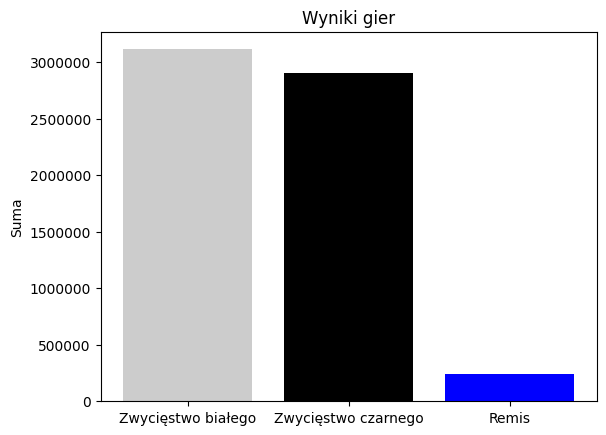

In [10]:
# Obliczanie liczby gier wygranych przez białego, czarnego i remisów
white_wins = (chess_data_raw['Result'] == '1-0').sum()
black_wins = (chess_data_raw['Result'] == '0-1').sum()
draws = (chess_data_raw['Result'] == '1/2-1/2').sum()
print(white_wins)
print(black_wins)
print(draws)
# Tworzenie wykresu słupkowego
results = ['Zwycięstwo białego', 'Zwycięstwo czarnego', 'Remis']
counts = [white_wins, black_wins, draws]

plt.bar(results, counts, color=['0.8', 'black', 'blue'])
plt.xlabel('')
plt.ylabel('Suma')
plt.title('Wyniki gier')

# Formatowanie etykiet osi Y jako liczby całkowite
plt.ticklabel_format(style='plain', axis='y')

plt.show()

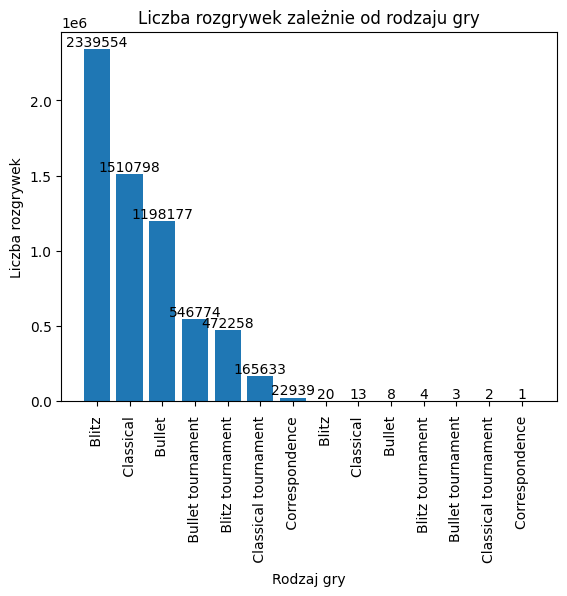

In [15]:
import matplotlib.pyplot as plt

# Pobieranie unikalnych rodzajów gier i odpowiadających im liczności
event_counts = chess_data_raw['Event'].value_counts()

# Tworzenie wykresu słupkowego
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Rodzaj gry')
plt.ylabel('Liczba rozgrywek')
plt.title('Liczba rozgrywek zależnie od rodzaju gry')
plt.xticks(rotation=90)

# Dodanie wartości nad każdym słupkiem
for i, value in enumerate(event_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

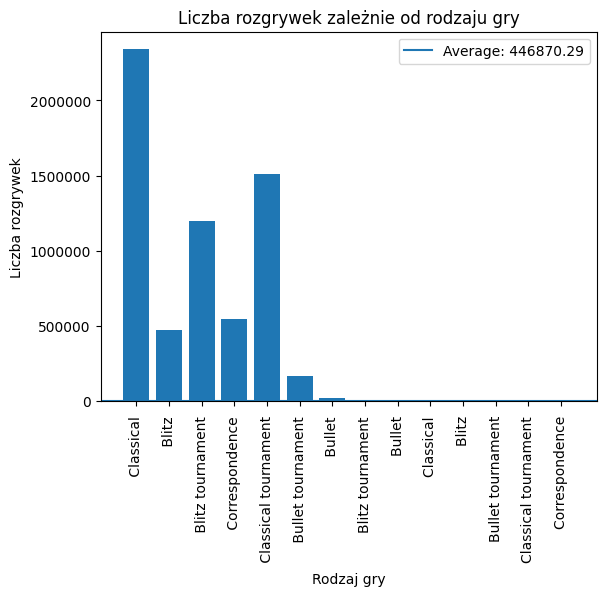

In [14]:
# Obliczanie średniej ilości gier w partii dla każdego rodzaju gier
average_games_per_event = chess_data_raw.groupby('Event').size().mean()

# Tworzenie wykresu słupkowego
plt.bar(chess_data_raw['Event'].unique(), chess_data_raw.groupby('Event').size())
plt.axhline(label=f'Average: {average_games_per_event:.2f}')
plt.xlabel('Rodzaj gry')
plt.ylabel('Liczba rozgrywek')
plt.title('Liczba rozgrywek zależnie od rodzaju gry')
plt.xticks(rotation=90)
plt.legend()

# Formatowanie etykiet osi Y jako liczby całkowite
plt.ticklabel_format(style='plain', axis='y')

plt.show()

<h4>Wyciągamy dane tylko dla ELO>1800

In [4]:
chess_data = chess_data_raw[(chess_data_raw['WhiteElo'] > 1800) & (chess_data_raw['BlackElo'] > 1800)]
print(chess_data.shape[0])

1896899


In [21]:
# Dane WhiteElo
white_elo_data = chess_data['WhiteElo']

# Obliczanie średniej
mean_white_elo = np.mean(white_elo_data)

# Obliczanie mediany
median_white_elo = np.median(white_elo_data)

# Obliczanie odchylenia standardowego
std_dev_white_elo = np.std(white_elo_data)

print("Średnia WhiteElo:", mean_white_elo)
print("Mediana WhiteElo:", median_white_elo)
print("Odchylenie standardowe WhiteElo:", std_dev_white_elo)

Średnia WhiteElo: 2019.3268998507565
Mediana WhiteElo: 1988.0
Odchylenie standardowe WhiteElo: 159.32342229537204


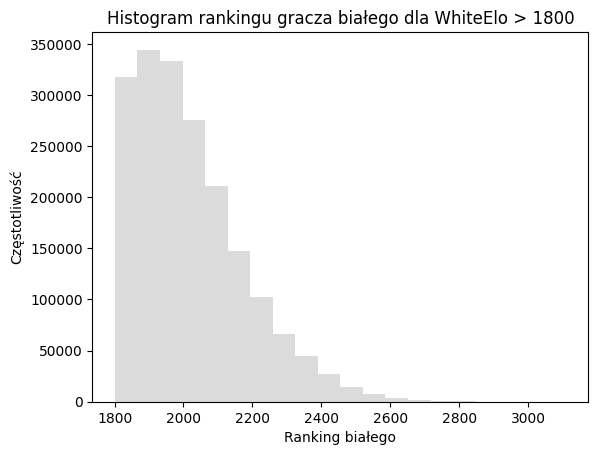

In [22]:
import matplotlib.pyplot as plt

# Wykres histogramu dla WhiteElo
plt.hist(chess_data['WhiteElo'], bins=20, color='0.8', alpha=0.7)
plt.xlabel('Ranking białego')
plt.ylabel('Częstotliwość')
plt.title('Histogram rankingu gracza białego dla WhiteElo > 1800')
plt.show()

In [23]:
# Dane WhiteElo
white_elo_data = chess_data['BlackElo']

# Obliczanie średniej
mean_white_elo = np.mean(white_elo_data)

# Obliczanie mediany
median_white_elo = np.median(white_elo_data)

# Obliczanie odchylenia standardowego
std_dev_white_elo = np.std(white_elo_data)

print("Średnia WhiteElo:", mean_white_elo)
print("Mediana WhiteElo:", median_white_elo)
print("Odchylenie standardowe WhiteElo:", std_dev_white_elo)

Średnia WhiteElo: 2019.4700671991498
Mediana WhiteElo: 1988.0
Odchylenie standardowe WhiteElo: 159.52971081088126


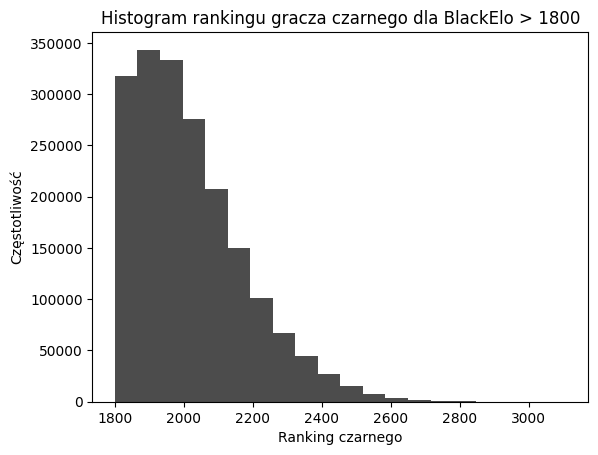

In [24]:
# Wykres histogramu dla BlackElo
plt.hist(chess_data['BlackElo'], bins=20, color='black', alpha=0.7)
plt.xlabel('Ranking czarnego')
plt.ylabel('Częstotliwość')
plt.title('Histogram rankingu gracza czarnego dla BlackElo > 1800')
plt.show()

929062
871713
95695


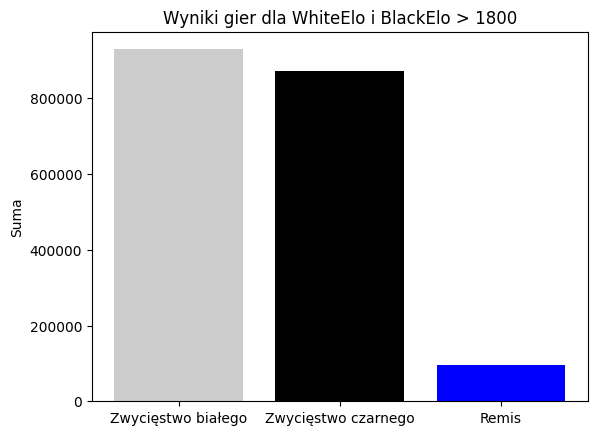

In [25]:
# Obliczanie liczby gier wygranych przez białego, czarnego i remisów
white_wins = (chess_data['Result'] == '1-0').sum()
black_wins = (chess_data['Result'] == '0-1').sum()
draws = (chess_data['Result'] == '1/2-1/2').sum()

print(white_wins)
print(black_wins)
print(draws)

# Tworzenie wykresu słupkowego
results = ['Zwycięstwo białego', 'Zwycięstwo czarnego', 'Remis']
counts = [white_wins, black_wins, draws]

plt.bar(results, counts, color=['0.8', 'black', 'blue'])
plt.xlabel('')
plt.ylabel('Suma')
plt.title('Wyniki gier dla WhiteElo i BlackElo > 1800')

# Formatowanie etykiet osi Y jako liczby całkowite
plt.ticklabel_format(style='plain', axis='y')

plt.show()

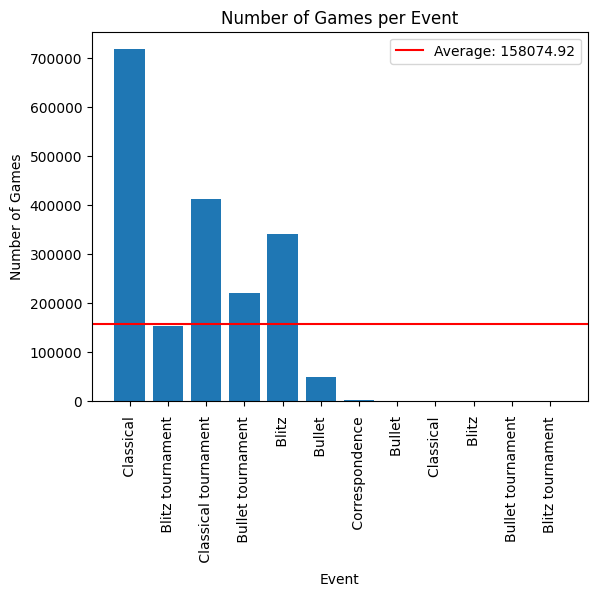

In [11]:
# Obliczanie średniej ilości gier w partii dla każdego rodzaju gier
average_games_per_event = chess_data.groupby('Event').size().mean()

# Tworzenie wykresu słupkowego
plt.bar(chess_data['Event'].unique(), chess_data.groupby('Event').size())
plt.axhline(y=average_games_per_event, color='r', linestyle='-', label=f'Average: {average_games_per_event:.2f}')
plt.xlabel('Event')
plt.ylabel('Number of Games')
plt.title('Number of Games per Event')
plt.xticks(rotation=90)
plt.legend()

# Formatowanie etykiet osi Y jako liczby całkowite
plt.ticklabel_format(style='plain', axis='y')

plt.show()

<h3>Przygotowanie danych treningowych i testowych

In [5]:
chess_data = chess_data_raw[(chess_data_raw['WhiteElo'] > 1800) & (chess_data_raw['BlackElo'] > 1800)]
chess_data = chess_data[['AN']]
chess_data = chess_data[-chess_data['AN'].str.contains('{')]
chess_data = chess_data[chess_data['AN'].str.len() > 20]
chess_data = chess_data[['AN']]
chess_data = chess_data[-chess_data['AN' ].str.contains('{')]
chess_data = chess_data[chess_data['AN' ].str.len() > 20]
print(chess_data.shape[0])
del chess_data_raw
gc.collect()

1659910


105

In [3]:
#1. Column indexes mapping
letter_2_num = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
num_2_letter = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h'}

#2. Chess-board to matrix
def create_rep_layer(board, piece_type):
    s = str(board)
    s = re.sub(f'[^{piece_type}{piece_type.upper()} \n]', '.', s)
    s = re.sub(f'{piece_type}', '-1', s)
    s = re.sub(f'{piece_type.upper()}', '1', s)
    s = re.sub(f'\.', '0', s)

    board_mat = []
    for row in s.split('\n'):
        row = row.split(' ')
        row = [int(x) for x in row]
        board_mat.append(row)

    return np.array(board_mat)

def board_2_rep(board):
    pieces = ['p', 'r', 'n', 'b', 'q', 'k']
    layers = []
    for piece in pieces:
        layers.append(create_rep_layer(board, piece))
    board_rep = np.stack(layers)
    return board_rep

#3. Chess-move to matrix
def move_2_rep(move, board):
    board.push_san(move).uci()
    move = str(board.pop())

    from_output_layer = np.zeros((8,8))
    from_row = 8 - int(move[1])
    from_column = letter_2_num[move[0]]
    from_output_layer[from_row, from_column] = 1

    to_output_layer = np.zeros((8,8))
    to_row = 8 - int(move[3])
    to_column = letter_2_num[move[2]]
    to_output_layer[to_row, to_column] = 1

    return np.stack([from_output_layer, to_output_layer])

#4. Game to Movex
def create_move_list(s):
    return re.sub('\d*\. ', '', s).split(' ')[:-1]

In [2]:
class ChessDataset(Dataset):
    def __init__(self, games, size=100_000):
        super(ChessDataset, self).__init__()
        self.games = games
        self.size = size
    def __len__(self):
        return self.size

    def __getitem__(self, index):
        game_i = np.random.randint(self.games.shape[0])
        random_game = chess_data['AN'].values[game_i]
        moves = create_move_list(random_game)
        game_state_i = np.random.randint(len(moves)-1)
        next_move = moves[game_state_i]
        moves = moves[:game_state_i]
        board = chess.Board()
        for move in moves:
            board.push_san(move)
        x = board_2_rep(board)
        y = move_2_rep(next_move, board)
        if game_state_i % 2 == 1:
            x *= -1
        return x, y

In [4]:
data_train = ChessDataset(chess_data['AN'], 5000)
data_train_loader = DataLoader(data_train, batch_size=32, shuffle=True, drop_last=True)

NameError: name 'chess_data' is not defined

<h5>Wygląd danych treningowych i testowych

In [8]:
# Pobranie następnego batcha danych
batch = next(iter(data_train_loader))

# Rozpakowanie przykładowych danych z batcha
sample_x, sample_y = batch

# Wyświetlenie przykładowych danych
print("Przykładowe dane x:\n", sample_x[0].numpy())
print("\n\nPrzykładowe dane y:\n", sample_y[0].numpy())

Przykładowe dane x:
 [[[ 0  0  0  0  0  0  0  0]
  [-1  0  0  0  0  0  0 -1]
  [ 0 -1 -1 -1  0 -1 -1  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  1  0  1  0  0  0]
  [ 0  1  0  0  0  1  0  0]
  [ 1  0  0  0  0  0  1  1]
  [ 0  0  0  0  0  0  0  0]]

 [[-1  0  0  0  0  0  0  0]
  [ 0  0  0  0  0 -1  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  1  1  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  1  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0 -1  0]
  [ 0  0  0  0 -1  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  1  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]
  [ 0  0  0  0  0  0  0  0]]

 [[ 0  0  0  0  0  0  0  0]
  [ 0  0 -1  0  0  0  0  0]
  [ 0  0  0  0  0  

<h1>Implementacja CNN

<h3>Implementacja architektury CNN

In [5]:
class module(nn.Module):

    def __init__(self, hidden_size):
        super(module, self).__init__()
        self.conv1 = nn.Conv2d(hidden_size, hidden_size, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(hidden_size, hidden_size, 3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(hidden_size)
        self.bn2 = nn.BatchNorm2d(hidden_size)
        self.activation1 = nn.SELU()
        self.activation2 = nn.SELU()

    def forward(self, x):
        x_input = torch.clone(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.activation1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = x + x_input
        x = self.activation2(x)
        return x
    
class ChessNet(nn.Module):
    def __init__(self, hidden_layers=6, hidden_size=300):
        super(ChessNet, self).__init__()
        self.hidden_layers = hidden_layers
        self.input_layer = nn.Conv2d(6, hidden_size, 3, stride=1, padding=1)
        self.module_list = nn.ModuleList([module(hidden_size) for i in range(hidden_layers)])
        self.output_layer = nn.Conv2d(hidden_size, 2, 3, stride=1, padding=1)

    def forward(self, x):
        x = self.input_layer(x)
        x = F.relu(x)

        for i in range(self.hidden_layers):
            x = self.module_list[i](x)

        x = self.output_layer(x)

        return x

<h3>Implementacja funkcji treningowej

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

def train_model_cross_entropy(model, train_loader, optimizer, num_epochs=10, useGpu = True):
    if useGpu:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
    model.train()

    criterion_from = nn.CrossEntropyLoss()
    criterion_to = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            if useGpu:
                inputs, targets = inputs.to(device).float(), targets.to(device).float()
            else:
                inputs, targets = inputs.float(), targets.float()

            optimizer.zero_grad()
            outputs = model(inputs)

            # Obliczanie straty dla pierwszej części wyjścia modelu
            loss_from = criterion_from(outputs[:, 0, :], targets[:, 0, :])

            # Obliczanie straty dla drugiej części wyjścia modelu
            loss_to = criterion_to(outputs[:, 1, :], targets[:, 1, :])

            # Sumowanie obu strat
            loss = loss_from + loss_to
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

def train_model_mse(model, train_loader, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()

    criterion_from = nn.MSELoss()
    criterion_to = nn.MSELoss()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, targets = inputs.to(device).float(), targets.to(device).float()

            optimizer.zero_grad()
            outputs = model(inputs)

            # Obliczanie straty dla pierwszej części wyjścia modelu
            loss_from = criterion_from(outputs[:, 0, :], targets[:, 0, :])

            # Obliczanie straty dla drugiej części wyjścia modelu
            loss_to = criterion_to(outputs[:, 1, :], targets[:, 1, :])

            # Sumowanie obu strat
            loss = loss_from + loss_to
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')

In [7]:
def calculate_accuracy(outputs, targets, threshold=0.3):
    predictions = (outputs > threshold).float()
    correct = (predictions == targets).float().sum()
    accuracy = correct / targets.numel()
    return accuracy.item()

def train_model_mse_with_accuracy(model, train_loader, optimizer, num_epochs=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.train()

    criterion_from = nn.MSELoss()
    criterion_to = nn.MSELoss()

    for epoch in range(num_epochs):
        running_loss = 0.0
        running_accuracy = 0.0

        for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs, targets = inputs.to(device).float(), targets.to(device).float()

            optimizer.zero_grad()
            outputs = model(inputs)

            # Obliczanie straty dla pierwszej części wyjścia modelu
            loss_from = criterion_from(outputs[:, 0, :], targets[:, 0, :])

            # Obliczanie straty dla drugiej części wyjścia modelu
            loss_to = criterion_to(outputs[:, 1, :], targets[:, 1, :])

            # Sumowanie obu strat
            loss = loss_from + loss_to
            
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            # Obliczanie dokładności
            acc = calculate_accuracy(outputs, targets)
            running_accuracy += acc * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = running_accuracy / len(train_loader.dataset)
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

In [8]:
def save_model(model, model_path):
    torch.save(model.state_dict(), model_path)
    print(f"Model został zapisany do pliku: {model_path}")

def load_model(model, model_path):
    model.load_state_dict(torch.load(model_path))

<h1>Proces uczenia modeli CNN

<h5>Model (hidden_layers=6, hidden_size=300) - Adam, MSE

In [37]:
model = ChessNet(hidden_layers=6, hidden_size=300)
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model_mse(model, data_train_loader, optimizer, 10)

save_model(model, "models/Models_6_300/Adam_MSE_10_loss_XXXX.pth")

Epoch 1/10: 100%|██████████| 3125/3125 [02:48<00:00, 18.52it/s]


Epoch 1/10, Loss: 0.1027


Epoch 2/10: 100%|██████████| 3125/3125 [02:51<00:00, 18.17it/s]


Epoch 2/10, Loss: 0.0288


Epoch 3/10: 100%|██████████| 3125/3125 [02:55<00:00, 17.85it/s]


Epoch 3/10, Loss: 0.0271


Epoch 4/10: 100%|██████████| 3125/3125 [02:54<00:00, 17.90it/s]


Epoch 4/10, Loss: 0.0260


Epoch 5/10: 100%|██████████| 3125/3125 [02:55<00:00, 17.80it/s]


Epoch 5/10, Loss: 0.0967


Epoch 6/10: 100%|██████████| 3125/3125 [02:55<00:00, 17.83it/s]


Epoch 6/10, Loss: 0.0314


Epoch 7/10: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 7/10, Loss: 0.0271


Epoch 8/10: 100%|██████████| 3125/3125 [02:55<00:00, 17.79it/s]


Epoch 8/10, Loss: 0.0257


Epoch 9/10: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 9/10, Loss: 0.0251


Epoch 10/10: 100%|██████████| 3125/3125 [02:54<00:00, 17.88it/s]

Epoch 10/10, Loss: 0.0249
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_10_loss_XXXX.pth


In [38]:
train_model_mse(model, data_train_loader, optimizer, 20)

save_model(model, "models/Models_6_300/Adam_MSE_30_loss_XXXX.pth")

Epoch 1/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.78it/s]


Epoch 1/20, Loss: 0.0280


Epoch 2/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.82it/s]


Epoch 2/20, Loss: 0.0243


Epoch 3/20: 100%|██████████| 3125/3125 [02:54<00:00, 17.88it/s]


Epoch 3/20, Loss: 0.0242


Epoch 4/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.66it/s]


Epoch 4/20, Loss: 0.0243


Epoch 5/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.86it/s]


Epoch 5/20, Loss: 0.0258


Epoch 6/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.80it/s]


Epoch 6/20, Loss: 0.0239


Epoch 7/20: 100%|██████████| 3125/3125 [02:54<00:00, 17.87it/s]


Epoch 7/20, Loss: 0.0251


Epoch 8/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 8/20, Loss: 0.0238


Epoch 9/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.84it/s]


Epoch 9/20, Loss: 0.0238


Epoch 10/20: 100%|██████████| 3125/3125 [02:54<00:00, 17.88it/s]


Epoch 10/20, Loss: 0.0248


Epoch 11/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.82it/s]


Epoch 11/20, Loss: 0.0236


Epoch 12/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.84it/s]


Epoch 12/20, Loss: 0.0237


Epoch 13/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.83it/s]


Epoch 13/20, Loss: 0.0237


Epoch 14/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 14/20, Loss: 0.0237


Epoch 15/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.72it/s]


Epoch 15/20, Loss: 0.0236


Epoch 16/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.74it/s]


Epoch 16/20, Loss: 0.0234


Epoch 17/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.70it/s]


Epoch 17/20, Loss: 0.0235


Epoch 18/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.77it/s]


Epoch 18/20, Loss: 0.0235


Epoch 19/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 19/20, Loss: 0.0235


Epoch 20/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.73it/s]

Epoch 20/20, Loss: 0.0234
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_30_loss_XXXX.pth


In [39]:
train_model_mse(model, data_train_loader, optimizer, 20)

save_model(model, "models/Models_6_300/Adam_MSE_50_loss_XXXX.pth")

Epoch 1/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.69it/s]


Epoch 1/20, Loss: 0.0234


Epoch 2/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 2/20, Loss: 0.0233


Epoch 3/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 3/20, Loss: 0.0233


Epoch 4/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.72it/s]


Epoch 4/20, Loss: 0.0232


Epoch 5/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.77it/s]


Epoch 5/20, Loss: 0.0232


Epoch 6/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 6/20, Loss: 0.0232


Epoch 7/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 7/20, Loss: 0.0232


Epoch 8/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 8/20, Loss: 0.0231


Epoch 9/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.77it/s]


Epoch 9/20, Loss: 0.0232


Epoch 10/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.73it/s]


Epoch 10/20, Loss: 0.0231


Epoch 11/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.72it/s]


Epoch 11/20, Loss: 0.0231


Epoch 12/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.75it/s]


Epoch 12/20, Loss: 0.0231


Epoch 13/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.74it/s]


Epoch 13/20, Loss: 0.0230


Epoch 14/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.76it/s]


Epoch 14/20, Loss: 0.0230


Epoch 15/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.79it/s]


Epoch 15/20, Loss: 0.0230


Epoch 16/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.73it/s]


Epoch 16/20, Loss: 0.0229


Epoch 17/20: 100%|██████████| 3125/3125 [02:55<00:00, 17.80it/s]


Epoch 17/20, Loss: 0.0229


Epoch 18/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.68it/s]


Epoch 18/20, Loss: 0.0229


Epoch 19/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.73it/s]


Epoch 19/20, Loss: 0.0229


Epoch 20/20: 100%|██████████| 3125/3125 [02:56<00:00, 17.66it/s]

Epoch 20/20, Loss: 0.0229
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_50_loss_XXXX.pth


In [17]:
model = ChessNet(hidden_layers=6, hidden_size=300)
load_model(model, "models/Models_6_300/Adam_MSE_50_loss_XXXX.pth")

In [18]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model_mse(model, data_train_loader, optimizer, 10)

save_model(model, "models/Models_6_300/Adam_MSE_70_loss_XXXX.pth")

Epoch 1/10: 100%|██████████| 1562/1562 [01:22<00:00, 19.03it/s]


Epoch 1/10, Loss: 0.0229


Epoch 2/10: 100%|██████████| 1562/1562 [01:20<00:00, 19.30it/s]


Epoch 2/10, Loss: 0.0229


Epoch 3/10: 100%|██████████| 1562/1562 [01:22<00:00, 19.04it/s]


Epoch 3/10, Loss: 0.0229


Epoch 4/10: 100%|██████████| 1562/1562 [01:22<00:00, 18.87it/s]


Epoch 4/10, Loss: 0.0229


Epoch 5/10: 100%|██████████| 1562/1562 [01:24<00:00, 18.46it/s]


Epoch 5/10, Loss: 0.0229


Epoch 6/10: 100%|██████████| 1562/1562 [01:23<00:00, 18.81it/s]


Epoch 6/10, Loss: 0.0228


Epoch 7/10: 100%|██████████| 1562/1562 [01:22<00:00, 18.92it/s]


Epoch 7/10, Loss: 0.0229


Epoch 8/10: 100%|██████████| 1562/1562 [01:22<00:00, 18.90it/s]


Epoch 8/10, Loss: 0.0228


Epoch 9/10: 100%|██████████| 1562/1562 [01:23<00:00, 18.72it/s]


Epoch 9/10, Loss: 0.0228


Epoch 10/10: 100%|██████████| 1562/1562 [01:22<00:00, 18.82it/s]

Epoch 10/10, Loss: 0.0228
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_70_loss_XXXX.pth


In [20]:
train_model_mse(model, data_train_loader, optimizer, 30)

save_model(model, "models/Models_6_300/Adam_MSE_100_loss_XXXX.pth")

Epoch 1/30: 100%|██████████| 1562/1562 [01:20<00:00, 19.36it/s]


Epoch 1/30, Loss: 0.0228


Epoch 2/30: 100%|██████████| 1562/1562 [01:22<00:00, 19.04it/s]


Epoch 2/30, Loss: 0.0228


Epoch 3/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.86it/s]


Epoch 3/30, Loss: 0.0227


Epoch 4/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.86it/s]


Epoch 4/30, Loss: 0.0227


Epoch 5/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.90it/s]


Epoch 5/30, Loss: 0.0226


Epoch 6/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.79it/s]


Epoch 6/30, Loss: 0.0228


Epoch 7/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.89it/s]


Epoch 7/30, Loss: 0.0228


Epoch 8/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.80it/s]


Epoch 8/30, Loss: 0.0227


Epoch 9/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.79it/s]


Epoch 9/30, Loss: 0.0227


Epoch 10/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.67it/s]


Epoch 10/30, Loss: 0.0227


Epoch 11/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.70it/s]


Epoch 11/30, Loss: 0.0227


Epoch 12/30: 100%|██████████| 1562/1562 [01:34<00:00, 16.49it/s]


Epoch 12/30, Loss: 0.0226


Epoch 13/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.59it/s]


Epoch 13/30, Loss: 0.0227


Epoch 14/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.61it/s]


Epoch 14/30, Loss: 0.0227


Epoch 15/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.74it/s]


Epoch 15/30, Loss: 0.0226


Epoch 16/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.78it/s]


Epoch 16/30, Loss: 0.0226


Epoch 17/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.62it/s]


Epoch 17/30, Loss: 0.0227


Epoch 18/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.68it/s]


Epoch 18/30, Loss: 0.0226


Epoch 19/30: 100%|██████████| 1562/1562 [01:26<00:00, 18.09it/s]


Epoch 19/30, Loss: 0.0227


Epoch 20/30: 100%|██████████| 1562/1562 [01:25<00:00, 18.18it/s]


Epoch 20/30, Loss: 0.0225


Epoch 21/30: 100%|██████████| 1562/1562 [01:26<00:00, 17.96it/s]


Epoch 21/30, Loss: 0.0226


Epoch 22/30: 100%|██████████| 1562/1562 [01:25<00:00, 18.26it/s]


Epoch 22/30, Loss: 0.0226


Epoch 23/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.44it/s]


Epoch 23/30, Loss: 0.0226


Epoch 24/30: 100%|██████████| 1562/1562 [01:25<00:00, 18.21it/s]


Epoch 24/30, Loss: 0.0226


Epoch 25/30: 100%|██████████| 1562/1562 [01:27<00:00, 17.89it/s]


Epoch 25/30, Loss: 0.0226


Epoch 26/30: 100%|██████████| 1562/1562 [01:27<00:00, 17.89it/s]


Epoch 26/30, Loss: 0.0225


Epoch 27/30: 100%|██████████| 1562/1562 [01:28<00:00, 17.72it/s]


Epoch 27/30, Loss: 0.0226


Epoch 28/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.49it/s]


Epoch 28/30, Loss: 0.0225


Epoch 29/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.61it/s]


Epoch 29/30, Loss: 0.0225


Epoch 30/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.62it/s]

Epoch 30/30, Loss: 0.0225
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_100_loss_XXXX.pth


In [53]:
model = ChessNet(hidden_layers=6, hidden_size=300)
load_model(model, "models/Models_6_300/Adam_MSE_100_loss_XXXX.pth")

In [54]:
optimizer = optim.Adam(model.parameters())
train_model_mse(model, data_train_loader, optimizer, 30)

save_model(model, "models/Models_6_300/Adam_MSE_130_loss_XXXX.pth")

Epoch 1/30:   0%|          | 0/1562 [00:00<?, ?it/s]C:\Users\krzys\AppData\Roaming\Python\Python39\site-packages\torch\optim\optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():
Epoch 1/30: 100%|██████████| 1562/1562 [01:21<00:00, 19.20it/s]


Epoch 1/30, Loss: 0.0226


Epoch 2/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.86it/s]


Epoch 2/30, Loss: 0.0225


Epoch 3/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.85it/s]


Epoch 3/30, Loss: 0.0226


Epoch 4/30: 100%|██████████| 1562/1562 [01:22<00:00, 18.83it/s]


Epoch 4/30, Loss: 0.0225


Epoch 5/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.77it/s]


Epoch 5/30, Loss: 0.0225


Epoch 6/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.76it/s]


Epoch 6/30, Loss: 0.0226


Epoch 7/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.75it/s]


Epoch 7/30, Loss: 0.0225


Epoch 8/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.70it/s]


Epoch 8/30, Loss: 0.0225


Epoch 9/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.59it/s]


Epoch 9/30, Loss: 0.0226


Epoch 10/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 10/30, Loss: 0.0225


Epoch 11/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 11/30, Loss: 0.0225


Epoch 12/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.42it/s]


Epoch 12/30, Loss: 0.0226


Epoch 13/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.64it/s]


Epoch 13/30, Loss: 0.0224


Epoch 14/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.51it/s]


Epoch 14/30, Loss: 0.0225


Epoch 15/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.57it/s]


Epoch 15/30, Loss: 0.0225


Epoch 16/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.47it/s]


Epoch 16/30, Loss: 0.0224


Epoch 17/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.64it/s]


Epoch 17/30, Loss: 0.0225


Epoch 18/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.60it/s]


Epoch 18/30, Loss: 0.0224


Epoch 19/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.38it/s]


Epoch 19/30, Loss: 0.0224


Epoch 20/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.59it/s]


Epoch 20/30, Loss: 0.0225


Epoch 21/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.59it/s]


Epoch 21/30, Loss: 0.0224


Epoch 22/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 22/30, Loss: 0.0225


Epoch 23/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.53it/s]


Epoch 23/30, Loss: 0.0225


Epoch 24/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.61it/s]


Epoch 24/30, Loss: 0.0224


Epoch 25/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.49it/s]


Epoch 25/30, Loss: 0.0225


Epoch 26/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.53it/s]


Epoch 26/30, Loss: 0.0225


Epoch 27/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.66it/s]


Epoch 27/30, Loss: 0.0225


Epoch 28/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.56it/s]


Epoch 28/30, Loss: 0.0224


Epoch 29/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.64it/s]


Epoch 29/30, Loss: 0.0223


Epoch 30/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.52it/s]


Epoch 30/30, Loss: 0.0225
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_130_loss_XXXX.pth


In [56]:
train_model_mse(model, data_train_loader, optimizer, 30)

save_model(model, "models/Models_6_300/Adam_MSE_160_loss_XXXX.pth")

Epoch 1/30: 100%|██████████| 1562/1562 [01:22<00:00, 19.05it/s]


Epoch 1/30, Loss: 0.0224


Epoch 2/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.64it/s]


Epoch 2/30, Loss: 0.0224


Epoch 3/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.74it/s]


Epoch 3/30, Loss: 0.0224


Epoch 4/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.68it/s]


Epoch 4/30, Loss: 0.0224


Epoch 5/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.53it/s]


Epoch 5/30, Loss: 0.0223


Epoch 6/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.52it/s]


Epoch 6/30, Loss: 0.0223


Epoch 7/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.65it/s]


Epoch 7/30, Loss: 0.0223


Epoch 8/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.61it/s]


Epoch 8/30, Loss: 0.0223


Epoch 9/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.57it/s]


Epoch 9/30, Loss: 0.0223


Epoch 10/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.58it/s]


Epoch 10/30, Loss: 0.0223


Epoch 11/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.67it/s]


Epoch 11/30, Loss: 0.0223


Epoch 12/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 12/30, Loss: 0.0223


Epoch 13/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.49it/s]


Epoch 13/30, Loss: 0.0223


Epoch 14/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.57it/s]


Epoch 14/30, Loss: 0.0224


Epoch 15/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.64it/s]


Epoch 15/30, Loss: 0.0223


Epoch 16/30: 100%|██████████| 1562/1562 [01:25<00:00, 18.26it/s]


Epoch 16/30, Loss: 0.0223


Epoch 17/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 17/30, Loss: 0.0222


Epoch 18/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.69it/s]


Epoch 18/30, Loss: 0.0222


Epoch 19/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.48it/s]


Epoch 19/30, Loss: 0.0223


Epoch 20/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.47it/s]


Epoch 20/30, Loss: 0.0222


Epoch 21/30: 100%|██████████| 1562/1562 [01:23<00:00, 18.69it/s]


Epoch 21/30, Loss: 0.0223


Epoch 22/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.48it/s]


Epoch 22/30, Loss: 0.0223


Epoch 23/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.46it/s]


Epoch 23/30, Loss: 0.0224


Epoch 24/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.40it/s]


Epoch 24/30, Loss: 0.0223


Epoch 25/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 25/30, Loss: 0.0222


Epoch 26/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.46it/s]


Epoch 26/30, Loss: 0.0223


Epoch 27/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.44it/s]


Epoch 27/30, Loss: 0.0222


Epoch 28/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 28/30, Loss: 0.0223


Epoch 29/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.57it/s]


Epoch 29/30, Loss: 0.0223


Epoch 30/30: 100%|██████████| 1562/1562 [01:24<00:00, 18.47it/s]


Epoch 30/30, Loss: 0.0223
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_160_loss_XXXX.pth


In [58]:
train_model_mse(model, data_train_loader, optimizer, 40)

save_model(model, "models/Models_6_300/Adam_MSE_200_loss_XXXX.pth")

Epoch 1/40: 100%|██████████| 1562/1562 [01:22<00:00, 18.99it/s]


Epoch 1/40, Loss: 0.0223


Epoch 2/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.55it/s]


Epoch 2/40, Loss: 0.0222


Epoch 3/40: 100%|██████████| 1562/1562 [01:23<00:00, 18.65it/s]


Epoch 3/40, Loss: 0.0222


Epoch 4/40: 100%|██████████| 1562/1562 [01:23<00:00, 18.62it/s]


Epoch 4/40, Loss: 0.0223


Epoch 5/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 5/40, Loss: 0.0222


Epoch 6/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.49it/s]


Epoch 6/40, Loss: 0.0222


Epoch 7/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.55it/s]


Epoch 7/40, Loss: 0.0222


Epoch 8/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.55it/s]


Epoch 8/40, Loss: 0.0222


Epoch 9/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.50it/s]


Epoch 9/40, Loss: 0.0222


Epoch 10/40: 100%|██████████| 1562/1562 [01:28<00:00, 17.68it/s]


Epoch 10/40, Loss: 0.0223


Epoch 11/40: 100%|██████████| 1562/1562 [01:26<00:00, 17.98it/s]


Epoch 11/40, Loss: 0.0223


Epoch 12/40: 100%|██████████| 1562/1562 [01:28<00:00, 17.57it/s]


Epoch 12/40, Loss: 0.0222


Epoch 13/40: 100%|██████████| 1562/1562 [01:28<00:00, 17.72it/s]


Epoch 13/40, Loss: 0.0222


Epoch 14/40: 100%|██████████| 1562/1562 [01:26<00:00, 18.10it/s]


Epoch 14/40, Loss: 0.0222


Epoch 15/40: 100%|██████████| 1562/1562 [01:26<00:00, 18.06it/s]


Epoch 15/40, Loss: 0.0222


Epoch 16/40: 100%|██████████| 1562/1562 [01:29<00:00, 17.55it/s]


Epoch 16/40, Loss: 0.0222


Epoch 17/40: 100%|██████████| 1562/1562 [01:28<00:00, 17.65it/s]


Epoch 17/40, Loss: 0.0221


Epoch 18/40: 100%|██████████| 1562/1562 [01:28<00:00, 17.60it/s]


Epoch 18/40, Loss: 0.0221


Epoch 19/40: 100%|██████████| 1562/1562 [01:26<00:00, 18.05it/s]


Epoch 19/40, Loss: 0.0222


Epoch 20/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.39it/s]


Epoch 20/40, Loss: 0.0222


Epoch 21/40: 100%|██████████| 1562/1562 [01:27<00:00, 17.83it/s]


Epoch 21/40, Loss: 0.0221


Epoch 22/40: 100%|██████████| 1562/1562 [01:25<00:00, 18.25it/s]


Epoch 22/40, Loss: 0.0222


Epoch 23/40: 100%|██████████| 1562/1562 [01:25<00:00, 18.30it/s]


Epoch 23/40, Loss: 0.0221


Epoch 24/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.40it/s]


Epoch 24/40, Loss: 0.0222


Epoch 25/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 25/40, Loss: 0.0221


Epoch 26/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.56it/s]


Epoch 26/40, Loss: 0.0221


Epoch 27/40: 100%|██████████| 1562/1562 [01:25<00:00, 18.35it/s]


Epoch 27/40, Loss: 0.0221


Epoch 28/40: 100%|██████████| 1562/1562 [01:25<00:00, 18.27it/s]


Epoch 28/40, Loss: 0.0222


Epoch 29/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.50it/s]


Epoch 29/40, Loss: 0.0221


Epoch 30/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.38it/s]


Epoch 30/40, Loss: 0.0222


Epoch 31/40: 100%|██████████| 1562/1562 [01:25<00:00, 18.29it/s]


Epoch 31/40, Loss: 0.0222


Epoch 32/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 32/40, Loss: 0.0221


Epoch 33/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.53it/s]


Epoch 33/40, Loss: 0.0221


Epoch 34/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.51it/s]


Epoch 34/40, Loss: 0.0221


Epoch 35/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.50it/s]


Epoch 35/40, Loss: 0.0222


Epoch 36/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.50it/s]


Epoch 36/40, Loss: 0.0221


Epoch 37/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.52it/s]


Epoch 37/40, Loss: 0.0221


Epoch 38/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.44it/s]


Epoch 38/40, Loss: 0.0221


Epoch 39/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.51it/s]


Epoch 39/40, Loss: 0.0221


Epoch 40/40: 100%|██████████| 1562/1562 [01:24<00:00, 18.50it/s]

Epoch 40/40, Loss: 0.0221
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_200_loss_XXXX.pth


In [67]:
model = ChessNet(hidden_layers=6, hidden_size=300)
load_model(model, "models/Models_6_300/Adam_MSE_200_loss_XXXX.pth")

In [68]:
optimizer = optim.Adam(model.parameters())
train_model_mse(model, data_train_loader, optimizer, 50)

save_model(model, "models/Models_6_300/Adam_MSE_250_loss_XXXX.pth")

Epoch 1/50: 100%|██████████| 1562/1562 [01:21<00:00, 19.09it/s]


Epoch 1/50, Loss: 0.0222


Epoch 2/50: 100%|██████████| 1562/1562 [01:22<00:00, 18.85it/s]


Epoch 2/50, Loss: 0.0221


Epoch 3/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.59it/s]


Epoch 3/50, Loss: 0.0221


Epoch 4/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.55it/s]


Epoch 4/50, Loss: 0.0221


Epoch 5/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.37it/s]


Epoch 5/50, Loss: 0.0221


Epoch 6/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.19it/s]


Epoch 6/50, Loss: 0.0221


Epoch 7/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.24it/s]


Epoch 7/50, Loss: 0.0221


Epoch 8/50: 100%|██████████| 1562/1562 [01:26<00:00, 18.13it/s]


Epoch 8/50, Loss: 0.0221


Epoch 9/50: 100%|██████████| 1562/1562 [01:26<00:00, 17.97it/s]


Epoch 9/50, Loss: 0.0221


Epoch 10/50: 100%|██████████| 1562/1562 [01:27<00:00, 17.82it/s]


Epoch 10/50, Loss: 0.0220


Epoch 11/50: 100%|██████████| 1562/1562 [01:27<00:00, 17.94it/s]


Epoch 11/50, Loss: 0.0221


Epoch 12/50: 100%|██████████| 1562/1562 [01:26<00:00, 18.04it/s]


Epoch 12/50, Loss: 0.0220


Epoch 13/50: 100%|██████████| 1562/1562 [01:26<00:00, 18.08it/s]


Epoch 13/50, Loss: 0.0221


Epoch 14/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.19it/s]


Epoch 14/50, Loss: 0.0220


Epoch 15/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.26it/s]


Epoch 15/50, Loss: 0.0220


Epoch 16/50: 100%|██████████| 1562/1562 [01:26<00:00, 18.13it/s]


Epoch 16/50, Loss: 0.0221


Epoch 17/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.25it/s]


Epoch 17/50, Loss: 0.0221


Epoch 18/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.32it/s]


Epoch 18/50, Loss: 0.0221


Epoch 19/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.27it/s]


Epoch 19/50, Loss: 0.0221


Epoch 20/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.38it/s]


Epoch 20/50, Loss: 0.0221


Epoch 21/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.41it/s]


Epoch 21/50, Loss: 0.0221


Epoch 22/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.31it/s]


Epoch 22/50, Loss: 0.0221


Epoch 23/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.25it/s]


Epoch 23/50, Loss: 0.0221


Epoch 24/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.46it/s]


Epoch 24/50, Loss: 0.0220


Epoch 25/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.32it/s]


Epoch 25/50, Loss: 0.0220


Epoch 26/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.37it/s]


Epoch 26/50, Loss: 0.0220


Epoch 27/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.42it/s]


Epoch 27/50, Loss: 0.0221


Epoch 28/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.35it/s]


Epoch 28/50, Loss: 0.0220


Epoch 29/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.38it/s]


Epoch 29/50, Loss: 0.0220


Epoch 30/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.33it/s]


Epoch 30/50, Loss: 0.0220


Epoch 31/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.48it/s]


Epoch 31/50, Loss: 0.0220


Epoch 32/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.41it/s]


Epoch 32/50, Loss: 0.0220


Epoch 33/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.39it/s]


Epoch 33/50, Loss: 0.0219


Epoch 34/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.43it/s]


Epoch 34/50, Loss: 0.0220


Epoch 35/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.44it/s]


Epoch 35/50, Loss: 0.0220


Epoch 36/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.39it/s]


Epoch 36/50, Loss: 0.0219


Epoch 37/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.42it/s]


Epoch 37/50, Loss: 0.0220


Epoch 38/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.52it/s]


Epoch 38/50, Loss: 0.0220


Epoch 39/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.38it/s]


Epoch 39/50, Loss: 0.0219


Epoch 40/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.37it/s]


Epoch 40/50, Loss: 0.0219


Epoch 41/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.54it/s]


Epoch 41/50, Loss: 0.0220


Epoch 42/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.40it/s]


Epoch 42/50, Loss: 0.0220


Epoch 43/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.57it/s]


Epoch 43/50, Loss: 0.0219


Epoch 44/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.39it/s]


Epoch 44/50, Loss: 0.0221


Epoch 45/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.42it/s]


Epoch 45/50, Loss: 0.0219


Epoch 46/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.47it/s]


Epoch 46/50, Loss: 0.0220


Epoch 47/50: 100%|██████████| 1562/1562 [01:25<00:00, 18.37it/s]


Epoch 47/50, Loss: 0.0219


Epoch 48/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.43it/s]


Epoch 48/50, Loss: 0.0220


Epoch 49/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.45it/s]


Epoch 49/50, Loss: 0.0220


Epoch 50/50: 100%|██████████| 1562/1562 [01:24<00:00, 18.42it/s]

Epoch 50/50, Loss: 0.0220
Model został zapisany do pliku: models/Models_6_300/Adam_MSE_250_loss_XXXX.pth


<h1>Ewaluacja modeli na danych treningowych

In [17]:
model = ChessNet(hidden_layers=6, hidden_size=300)
load_model(model, "models/Models_6_300/SGD_MSE_250_loss_XXXX.pth")
model.eval()

NameError: name 'ChessNet' is not defined

In [10]:
num_2_num_rev = {0: '8', 1: '7', 2: '6', 3: '5', 4: '4', 5: '3', 6: '2', 7: '1'}

def getCoordsFromTargets(targetsData):
    moveFrom = torch.nonzero(targetsData[0] == 1)
    moveTo = torch.nonzero(targetsData[1] == 1)
    moveFrom = moveFrom.detach().cpu().numpy()
    moveTo = moveTo.detach().cpu().numpy()
    moveFrom = num_2_letter[moveFrom[0][1]] + num_2_num_rev[moveFrom[0][0]]
    moveTo = num_2_letter[moveTo[0][1]] + num_2_num_rev[moveTo[0][0]]

    return moveFrom+moveTo

In [11]:
def tensor_to_fen(chessboard):
    chessboard = chessboard.clone()
    for i in range(len(chessboard)):
        chessboard[i] = chessboard[i]*(i+1)

    pieces_mapping = {0: '.', 1: 'p', -1: 'P', 2: 'r', -2: 'R', 3: 'n', -3: 'N',
                      4: 'b', -4: 'B', 5: 'q', -5: 'Q', 6: 'k', -6: 'K'}
    
    fen_rows = []
    for i in range(8):
        fen_row = ''
        empty_count = 0
        for j in range(8):
            piece = chessboard[:, i, j].sum().item()
            if piece == 0:
                empty_count += 1
            else:
                if empty_count > 0:
                    fen_row += str(empty_count)
                    empty_count = 0
                fen_row += pieces_mapping[piece]
        if empty_count > 0:
            fen_row += str(empty_count)
        fen_rows.append(fen_row)
    
    fen_position = '/'.join(fen_rows)
    
    player_to_move = 'w' if chessboard[:, :, :].sum().item() > 0 else 'b'
    
    castling = '-'
    en_passant = '-'
    halfmove_clock = 0
    
    fullmove_number = 1
    
    return f"{fen_position} {player_to_move} {castling} {en_passant} {halfmove_clock} {fullmove_number}"

<h1>Implementacja bota przy użyciu modelu CNN

<h3>Implementacja funkcji zamieniającej odpowiedź modelu na ruch w szachach

In [14]:
import random
import copy

def choose_move(model_temp, board):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_temp.to(device)

    color = None
    if board.turn:
        color = chess.WHITE
    else:
        color = chess.BLACK
    legal_moves = list(board.legal_moves)

    x = torch.Tensor(board_2_rep(board)).float().to('cuda')
    if color == chess.BLACK:
        x *= -1
    x = x.unsqueeze(0)
    move = model_temp(x.to(device))
    vals = []
    for legal_move in legal_moves:
        from_ = str(legal_move)[:2]
        to = str(legal_move)[2:]
        val_temp = move[0,:,:][0][8 - int(from_[1]), letter_2_num[from_[0]]]
        val = move[0,:,:][1][8 - int(to[1]), letter_2_num[to[0]]] #możliwe że ma być move[1,:,:]
        vals.append(val.cpu().detach() + val_temp.cpu().detach())
    
    try:
        choosen_move = legal_moves[np.argmax(vals)]
    except:
        choosen_move = np.random.choice(legal_moves)

    return choosen_move

<h3>Implementacja funkcji sprawdzającej czy jest możliwy tzw. Ruch książkowy

In [15]:
def is_book_move(board):
    try:
        bookMoves = []
        with chess.polyglot.open_reader("data/bookfish.bin") as reader:
            for entry in reader.find_all(board):
                bookMoves.append(entry.move)
        return random.choice(bookMoves)
    except:
        return None

def check_mate_single(board):
    board = board.copy()
    legal_moves = list(board.legal_moves)
    for move in legal_moves:
        board.push_uci(str(move))
        if board.is_checkmate():
            move = board.pop()
            return move
        _ = board.pop()

<h3>Funkcja rozgrywki model vs model

In [16]:
from collections import Counter

def get_best_move(model_temp, board):
    book_move = None
    book_move = is_book_move(board)
    if book_move is not None:
        return book_move

    mate_move = check_mate_single(board)
    if mate_move is not None:
        return mate_move
    
    return choose_move(model_temp, board)

def play_chess(model_temp, max_moves=50):
    board = chess.Board()
    moves = 0
    while not board.is_game_over():
        moves += 1
        if moves > max_moves:
            break

        # Ruch komputera 1
        computer_move = get_best_move(model_temp, board)
        if computer_move:
            board.push(computer_move)
        print(str(moves) + ". "+str(computer_move), end='')
        moves += 1
        # Ruch komputera 2
        computer_move = get_best_move(model_temp, board)
        if computer_move:
            board.push(computer_move)
        print(" "+str(moves) + ". "+str(computer_move)+" ", end='')

    # Koniec gry
    print("Koniec gry!")
    if board.is_checkmate():
        print("Mat! Wygrałeś!")
    elif board.is_stalemate():
        print("Pat! Remis!")
    elif board.is_insufficient_material():
        print("Remis z powodu niewystarczającej liczby materiału!")
    elif board.is_seventyfive_moves():
        print("Remis z powodu zasady siedemdziesięciu ruchów!")
    elif board.is_fivefold_repetition():
        print("Remis z powodu pięciokrotnego powtórzenia pozycji!")

<h3>5.4 Funkcja rozgrywki gracz vs model

In [17]:
def play_aganist_bot(model_temp, max_moves = 50):
    board = chess.Board()
    moves = 0
    while not board.is_game_over() or moves < max_moves:
        # Ruch gracza
        moves += 1
        print("Twoja kolej na ruch:")
        player_move = input("Podaj swój ruch w notacji szachowej (np. e2e4): ")
        if player_move.lower() == "stop":
            print("Gra zakończona.")
            return
        elif chess.Move.from_uci(player_move) in board.legal_moves:
            board.push(chess.Move.from_uci(player_move))
        else:
            print("Nieprawidłowy ruch. Spróbuj ponownie.")
            continue

        # Ruch komputera 1
        computer_move = get_best_move(model_temp, board)
        if computer_move:
            board.push(computer_move)
        print(str(moves) + ". "+str(computer_move), end='')
        moves += 1
        # Wyświetlanie aktualnej pozycji na szachownicy
        print(board)

    # Koniec gry
    print("Koniec gry!")
    if board.is_checkmate():
        print("Mat! Wygrałeś!")
    elif board.is_stalemate():
        print("Pat! Remis!")
    elif board.is_insufficient_material():
        print("Remis z powodu niewystarczającej liczby materiału!")
    elif board.is_seventyfive_moves():
        print("Remis z powodu zasady siedemdziesięciu ruchów!")
    elif board.is_fivefold_repetition():
        print("Remis z powodu pięciokrotnego powtórzenia pozycji!")